In [2]:
from dataclasses import dataclass
import itertools
import logging
import random
import math
import numpy as np
import json
import pickle
import time
import torch
import sys
import pdb
import os
# os.chdir("/Users/guotianyu/GitHub/birth")

from omegaconf import OmegaConf
from pathlib import Path
from torch import nn, Tensor
from torch.nn import functional as F
from typing import List, Optional, Tuple

from data import *
from ihead_full_model import ModelArgs, Transformer
%load_ext autoreload
%autoreload 2

# Preprocess Meta

In [29]:
d=0.15
data_args = DataArgs(delimiter_p=d,)
ds = MetaProcess(data_args)
ds.bos_num
import pickle
import yaml

meta_processed = ds.process()
config_path = "data/bos1_d015"
os.makedirs(config_path, exist_ok=True)
with open(os.path.join(config_path, 'meta.pickle'), 'wb') as handle:
    pickle.dump(meta_processed, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(os.path.join(config_path, 'config.yaml'), 'w') as f:
    yaml.dump(meta_processed, f, default_flow_style=False)



In [36]:
d=0.1
data_args = DataArgs(delimiter_p=d, delim_num=2)
ds = MetaProcess(data_args)
ds.bos_num
import pickle
import yaml

meta_processed = ds.two_delim_process()
config_path = "data/bos1_d010_delim2"
os.makedirs(config_path, exist_ok=True)
with open(os.path.join(config_path, 'meta.pickle'), 'wb') as handle:
    pickle.dump(meta_processed, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(os.path.join(config_path, 'config.yaml'), 'w') as f:
    yaml.dump(meta_processed, f, default_flow_style=False)

# load meta and test corresponding dgp

In [25]:
import pickle
import numpy as np
data_args = DataArgs(delimiter_p=0)
with open("/Users/guotianyu/GitHub/birth/data/bos1_d0/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)

# data_cfg = OmegaConf.structured(meta_info)
ds = dormant_copy(data_args, meta_info)
x = ds.gen_batch(np.random.default_rng(0), 64)

In [27]:
x[9]

array([65, 46, 63, 11,  1, 11,  1, 11,  1, 11,  0, 20, 17, 26, 32, 10,  0,
       21,  1, 21, 10,  0, 31, 10,  1, 10,  0,  0, 19,  1, 19,  1, 19, 30,
       17, 10,  0, 18,  1, 18, 47, 43, 47, 60, 43, 60, 53, 60, 47, 42, 43,
       42, 53, 42,  6,  1,  6,  1,  6,  1,  6,  0, 20, 53, 20, 21, 38, 13,
       52, 41, 46, 39, 46, 58, 46, 53, 46, 63, 53, 63,  1, 63, 53, 63,  1,
       63,  1, 63,  1, 63, 53, 63,  1, 63,  1, 63,  1, 63,  1, 63, 53, 63,
       53, 63, 43, 63,  1, 63,  1, 63,  1, 63, 43, 63,  1, 63, 43, 63, 53,
       63,  8,  0, 32, 46, 43, 46, 39, 46, 63, 53, 63,  2,  0, 27, 33, 17,
       26, 17, 17, 32, 46, 43, 46, 39, 46, 58, 46, 47, 58, 47, 52,  1, 52,
       53, 52, 57, 58, 57,  6,  1,  6,  1,  6,  1,  6,  0,  0, 35, 13, 52,
       42, 53, 42, 43, 42,  1, 42, 47, 43, 47, 50,  1, 50, 57, 58, 57, 58,
       57,  1, 57, 58, 57, 58, 57, 53, 57,  1, 57,  1, 57, 43, 57,  0,  0,
       32, 13,  1, 13, 19, 53, 19, 53, 19,  1, 19, 53, 19, 47, 60, 47, 58,
       47, 52,  1, 52, 43

In [4]:
ds.idxs

[39, 53, 58, 43, 1]

# Test on dormant_copy_interpolate

In [6]:
import pickle
import numpy as np
data_args1 = DataArgs(delimiter_p=0, mix_p=0)
data_args2 = DataArgs(delimiter_p=0, mix_p=1)

with open("/Users/guotianyu/GitHub/birth/data/bos1_d0/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)

# data_cfg = OmegaConf.structured(meta_info)
ds1 = dormant_copy_interpolate(data_args1, meta_info)
ds2 = dormant_markov_interpolate(data_args2, meta_info)
x1 = ds1.gen_batch(np.random.default_rng(0), 64)
x2 = ds2.gen_batch(np.random.default_rng(0), 64)

In [7]:
x1[0], x2[0]

(array([65, 51, 39, 54, 53, 58, 59, 56, 57,  1,  1, 53, 63,  8,  0, 31, 13,
        54, 43, 53, 57, 46, 53, 53, 10,  0,  0, 13, 46, 43, 43, 57, 58, 46,
        58, 43, 43, 57, 53,  0, 56,  1, 54, 43, 43, 57, 53, 53, 56,  1, 39,
        52,  8,  0, 14, 43, 30, 35, 47, 52, 53, 58, 52,  1, 45, 50,  1, 43,
        63,  1, 53, 63,  1, 11,  1,  0, 28, 17, 37, 43, 43, 45, 53, 39, 42,
        11,  0, 31, 21, 27, 18, 47, 57,  1, 58, 40, 43, 50,  1, 53, 40, 57,
        57, 47, 42,  1, 47, 52,  1, 53, 41, 46,  6,  0, 32, 46, 63,  1,  1,
        50, 50, 50,  1, 43, 52, 58, 57,  1, 58, 63,  1,  1, 57,  1, 43, 57,
         1,  2,  0,  0, 35, 46, 43, 47, 56,  6,  1,  0, 30, 17, 37, 10,  0,
        13,  1, 61, 43, 47, 57,  6,  1,  1, 58, 58, 46, 53, 47, 52,  5,  1,
        58, 40, 63, 57, 59, 57, 46, 43, 39, 52,  1, 45, 46, 43, 39,  1, 54,
        50, 39, 53, 56, 58, 57,  1, 57,  1, 57,  1,  1, 46, 39, 43, 57,  7,
        44,  1, 47, 53, 58, 61,  1, 56, 59, 52, 45, 57, 54, 39, 39, 58, 57,
        63, 

## so dormant_copy_interpolate(mix_p=0) == dormant_markov_interpolate(mix_p=1); seems that the code passes the test

# Test on dormant_double_tasks

In [57]:
import pickle
import numpy as np
data_args = DataArgs(delimiter_p=0.05)
with open("/Users/guotianyu/GitHub/birth/data/bos1_d005/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)

# data_cfg = OmegaConf.structured(meta_info)
ds = dormant_double_tasks(data_args, meta_info)
x = ds.gen_batch(np.random.default_rng(0), 64)

In [62]:
np.where(x==66)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 array([ 15, 146,  61,  10,  14,  18,  33,   2,  41,  67,   8,  36,  23,
         39, 103,   4,  36,  35, 111,  42,   2,  11,  17,  60,  51,  23,
         21,  13,   7,  32,  23,  30,  11,   2,  31,  19,  12,  13,   2,
        125,  34,  13,  26,  22,  20,  16,  27,  30,   3, 200,   9,  30,
         74,  26,  11,  84,   8,   8,  31,  25,  48,  67,  12,   2]))

In [54]:
test = np.reshape(np.array(np.arange(0,25)), (5,5))
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [55]:
subset = [2, 3, 4]
for i, n in enumerate(subset):
    if i < len(subset)-1:
        shift = subset[i+1]
        test[[n, shift]] = test[[shift, n]]
        test[:, [n, shift]] = test[:, [shift, n]]
test

array([[ 0,  1,  3,  4,  2],
       [ 5,  6,  8,  9,  7],
       [15, 16, 18, 19, 17],
       [20, 21, 23, 24, 22],
       [10, 11, 13, 14, 12]])

In [3]:
a = [1, 2, 3, 4]
a[:4]

[1, 2, 3, 4]

# Test on double copy task

In [56]:
import pickle
import numpy as np
data_args = DataArgs(delimiter_p=0.1, delim_num=2)
with open("/Users/guotianyu/GitHub/birth/data/bos1_d010_delim2/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)

# data_cfg = OmegaConf.structured(meta_info)
ds = dormant_two_kinds_copies(data_args, meta_info)
x = ds.gen_batch(np.random.default_rng(0), 64)

In [58]:
x[0]

array([65, 50, 42,  1, 19, 66, 19, 53, 59, 56, 67, 57,  0, 66,  0, 35, 43,
       66, 43,  8,  0,  0,  0, 32, 47, 57, 43, 67, 44, 53, 59, 57, 43,  1,
       59, 56, 42, 12, 66, 12,  0, 31, 21, 27, 23, 17, 66, 17, 31, 10, 66,
       10,  0, 66,  0, 19,  1, 52, 63,  1, 30, 21,  1, 39, 57,  6,  1, 42,
       67, 43,  1, 58, 67, 59, 67, 60, 43, 56, 67, 57, 43, 58, 46, 43, 61,
       46, 53, 59, 67, 60, 47, 67, 48, 39, 66, 39, 67, 40, 67, 41, 66, 41,
       43, 66, 43,  6,  1, 51, 67, 52, 58, 47, 41, 56,  1, 61, 47, 67, 48,
       66, 48, 53, 56, 67, 57,  1, 44, 66, 44,  1, 46, 47, 57, 66, 57,  6,
        1, 66,  1, 67,  2,  1, 57, 66, 57, 43, 67, 44, 66, 44, 66, 44, 43,
        1, 58, 39, 58, 67, 59, 66, 59, 52, 43, 50, 67, 51, 43,  6, 66,  6,
        1, 47, 67, 48, 43, 66, 43, 56, 67, 57, 58, 66, 58,  1, 58, 53, 44,
       43, 67, 44, 53, 44, 53, 57,  1, 67,  2,  0, 46, 67, 47, 52,  8,  0,
       13, 52, 52, 67, 53, 56, 58,  1, 50,  1, 60, 43, 42, 66, 42, 67, 43,
       67, 44,  1, 39, 66

# Test on double_tasks_retrt new

In [76]:
import pickle
import numpy as np
data_args = DataArgs(delimiter_p=0)
with open("/Users/guotianyu/GitHub/birth/data/bos1_d0/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)

# data_cfg = OmegaConf.structured(meta_info)
ds = dormant_double_tasks_retry(data_args, meta_info)
x = ds.gen_batch(np.random.default_rng(0), 64)

In [78]:
np.where(x == 66)

(array([ 0,  1,  2,  3,  4,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31,
        31, 32, 33, 34, 35, 35, 35, 36, 37, 38, 39, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 54, 55, 55, 56, 57, 58, 59,
        60, 61, 62, 63]),
 array([ 13,  65,  23,  81,  46,  48, 130, 143,  36,  53,  72, 163, 103,
        117,  10,  35, 100,  81, 169,   5,   6,  70,  97,  57,  67, 105,
         71,  69, 103, 166, 118,  68,  70,  29,  31, 103,  60,  24,  16,
         18,  20, 105,  55,  98,  17,  19,  12,  47,  26, 111, 166,  83,
         12, 143,  57,  27,   7, 105,  33,  42,  21,  23, 130, 132,  41,
        123, 115,   7,  89,  43, 169,  20]))

# Test on dormant doule explore 2

In [11]:
import pickle
import numpy as np
from data import dormant_double_tasks_explore2
data_args = DataArgs(k=3, delimiter_p=0)
# with open("/Users/guotianyu/GitHub/birth/data/bos1_d0/meta.pickle", "rb") as f:
#     meta_info = pickle.load(f)
with open("/data/tianyu_guo/birth/data/bos1_d0/meta.pickle", "rb") as f:
    meta_info = pickle.load(f)
# data_cfg = OmegaConf.structured(meta_info)
ds = dormant_double_tasks_explore2(data_args, meta_info)
# x = ds.gen_batch(np.random.default_rng(0), 64)

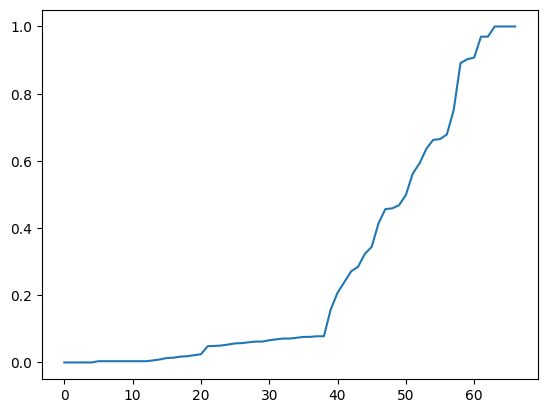

In [13]:
import matplotlib.pyplot as plt
plt.plot(ds.cond[1, :].cumsum())

In [18]:
ds.cond[58, :].cumsum()[50]

0.8237997880881672